In [1]:
import pandas as pd
import numpy as np
import mysql.connector
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
db_connection = mysql.connector.connect(user='root', password='123456', host='127.0.0.1', database='purl_mage_to_anonimize')
sales_order = pd.read_sql(
    '''SELECT DISTINCT
    sfod.email,
    sfod.firstname,
    sfod.lastname,
    sfod.street,
    sfod.city,
    sfod.region,
    sfod.postcode,
    temp_table.*
FROM
    sales_flat_order_address AS sfod
        INNER JOIN
    (SELECT DISTINCT
        sfq.customer_id,
            sfq.customer_email,
            SUM(sfq.items_qty) AS total_quantaty,
            SUM(s_price.sum_price) AS total_customer_purchase
    FROM
        sales_flat_quote AS sfq
    INNER JOIN (SELECT 
        quote_id, SUM(price) AS sum_price
    FROM
        sales_flat_quote_item AS sqi
    WHERE
        sqi.price <> 0
    GROUP BY quote_id) AS s_price ON sfq.entity_id = s_price.quote_id
    WHERE
        sfq.customer_id IS NOT NULL
    GROUP BY sfq.customer_id , sfq.customer_email
    ORDER BY total_customer_purchase DESC) AS temp_table ON temp_table.customer_email = sfod.email

    ''', con=db_connection)

    

In [3]:
sales_order.head()

,email,firstname,lastname,street,city,region,postcode,customer_id,customer_email,total_quantaty,total_customer_purchase
0,shepherdpower@gmail.com,Kate,Power,4532 Keswick Rd.,Baltimore,Maryland,21210,144361,shepherdpower@gmail.com,1.0,18.50
1,lindsey_fieb@hotmail.com,Lindsey,Fiebelkorn,821 Felton ave,Gregory,South Dakota,57533,12392,lindsey_fieb@hotmail.com,7.0,178.35
2,katelizabethmoss@gmail.com,Catherine,Moss,514 Mesa Grande Drive,Palm Desert,California,92211,100414,katelizabethmoss@gmail.com,31.0,480.50
3,rituharrison@gmail.com,Ritu,Harrison,45 Spruce St,Princeton,New Jersey,08542,50294,rituharrison@gmail.com,11.0,141.50
4,jenaflower@gmail.com,Jennifer,Jahnke,9122 Carrolltown Dr,Huntington Beach,California,92646,98,jenaflower@gmail.com,17.0,577.10


In [4]:
# sales_order = sales_order[sales_order['email'] != 'jenaflower@gmail.com']

In [5]:
sales_order.email.value_counts().head()

psheidebrecht@icloud.com    16
buyers.jessica@gmail.com    14
sheryl@accuad.com           13
zoomgoboom@yahoo.com        12
jenaflower@gmail.com        12
Name: email, dtype: int64

In [6]:
sales_order[sales_order['email']=='malger@cooley.com']

,email,firstname,lastname,street,city,region,postcode,customer_id,customer_email,total_quantaty,total_customer_purchase
768,malger@cooley.com,Maureen,Alger,PO Box 2783,El Granada,California,94018,100481,malger@cooley.com,58.0,428.5
2570,malger@cooley.com,Maureen,Alger,Cooley LLP\n3175 Hanover Street,Palo Alto,California,94304,100481,malger@cooley.com,58.0,428.5
2571,malger@cooley.com,Maureen Alger,None,Cooley LLP\n3175 Hanover Street,Palo Alto,California,94304,100481,malger@cooley.com,58.0,428.5
5957,malger@cooley.com,Maureen,Alger,315 Valencia Ave,El Granada,California,94018-2783,100481,malger@cooley.com,58.0,428.5
5958,malger@cooley.com,Maureen Alger,None,315 Valencia Ave,El Granada,California,94018-2783,100481,malger@cooley.com,58.0,428.5
9626,malger@cooley.com,Maureen,Alger,None,None,None,None,100481,malger@cooley.com,58.0,428.5
24971,malger@cooley.com,Maureen,Alger,430 3rd Ave,Half Moon Bay,California,94019,100481,malger@cooley.com,58.0,428.5
24972,malger@cooley.com,Maureen Alger,None,430 3rd Ave,Half Moon Bay,California,94019,100481,malger@cooley.com,58.0,428.5


In [7]:
sales_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31134 entries, 0 to 31133
Data columns (total 11 columns):
email                      31134 non-null object
firstname                  31134 non-null object
lastname                   25754 non-null object
street                     27673 non-null object
city                       27673 non-null object
region                     26637 non-null object
postcode                   27658 non-null object
customer_id                31134 non-null int64
customer_email             31134 non-null object
total_quantaty             31134 non-null float64
total_customer_purchase    31134 non-null float64
dtypes: float64(2), int64(1), object(8)
memory usage: 2.6+ MB


In [8]:
# noticed since we group them by email and ID, total quantaty and total customer purhcase is the same on all duplicates.  
# lets remove duplicates and keep first instance

non_dup = sales_order.drop_duplicates(['customer_id'], keep='first')

In [9]:
# now lets verify
non_dup[non_dup['customer_id'] == 100481]

,email,firstname,lastname,street,city,region,postcode,customer_id,customer_email,total_quantaty,total_customer_purchase
768,malger@cooley.com,Maureen,Alger,PO Box 2783,El Granada,California,94018,100481,malger@cooley.com,58.0,428.5


In [10]:
non_dup.customer_id.value_counts().head()

135166    1
109280    1
111331    1
170726    1
129770    1
Name: customer_id, dtype: int64

In [11]:
non_dup.dropna(axis=0,subset=['region'], inplace=True )

/Users/tomasespina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
non_dup.head()

,email,firstname,lastname,street,city,region,postcode,customer_id,customer_email,total_quantaty,total_customer_purchase
0,shepherdpower@gmail.com,Kate,Power,4532 Keswick Rd.,Baltimore,Maryland,21210,144361,shepherdpower@gmail.com,1.0,18.50
1,lindsey_fieb@hotmail.com,Lindsey,Fiebelkorn,821 Felton ave,Gregory,South Dakota,57533,12392,lindsey_fieb@hotmail.com,7.0,178.35
2,katelizabethmoss@gmail.com,Catherine,Moss,514 Mesa Grande Drive,Palm Desert,California,92211,100414,katelizabethmoss@gmail.com,31.0,480.50
3,rituharrison@gmail.com,Ritu,Harrison,45 Spruce St,Princeton,New Jersey,08542,50294,rituharrison@gmail.com,11.0,141.50
4,jenaflower@gmail.com,Jennifer,Jahnke,9122 Carrolltown Dr,Huntington Beach,California,92646,98,jenaflower@gmail.com,17.0,577.10


In [13]:
non_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16046 entries, 0 to 31132
Data columns (total 11 columns):
email                      16046 non-null object
firstname                  16046 non-null object
lastname                   16046 non-null object
street                     16046 non-null object
city                       16046 non-null object
region                     16046 non-null object
postcode                   16043 non-null object
customer_id                16046 non-null int64
customer_email             16046 non-null object
total_quantaty             16046 non-null float64
total_customer_purchase    16046 non-null float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.5+ MB


In [14]:
import os
plotlyapi = os.environ.get('PLOTLYAPI')
plotlyuser = os.environ.get('PLOTLYUSER')
mapbox = os.environ.get('MAPBOX')

In [15]:
import plotly
plotly.tools.set_credentials_file(username=plotlyuser, api_key=plotlyapi)
plotly.__version__


'2.2.3'

In [16]:
import plotly.plotly as py
from plotly.graph_objs import *

mapbox_access_token = mapbox

In [17]:
sales_count = {}

for s in non_dup.region:
    if s not in sales_count:
        sales_count[s] = 1
    else:
        sales_count[s] += 1

In [18]:
sales_count_df = pd.DataFrame(list(sales_count.items()), columns=['State', 'Count'])

In [19]:
sales_count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 2 columns):
State    446 non-null object
Count    446 non-null int64
dtypes: int64(1), object(1)
memory usage: 7.0+ KB


In [20]:
sales_count_df.head()

,State,Count
0,Maryland,292
1,South Dakota,22
2,California,1983
3,New Jersey,464
4,Tennessee,188


In [21]:
sales_count_df.iloc[0:1]

,State,Count
0,Maryland,292


In [22]:
scl = [[0.0, 'rgb(255, 230, 247)'],[0.2, 'rgb(255, 102, 207)'],[0.4, 'rgb(255, 102, 207)'],\
            [0.6, 'rgb(204, 0, 139)'],[0.8, 'rgb(102, 0, 70)'],[1.0, 'rgb(51, 0, 37)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = sales_count_df['State'],
        z = sales_count_df['Count'].astype(float),
        locationmode = 'USA-states',
    #    text = statedf['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Comment Volume"
        )
    ) ]

layout = dict(
        title = 'Comment Value Grade',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )
    
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Purl Comments Sales.html')

In [23]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [24]:
sales_count_df['State'].update(sales_count_df['State'].map(us_state_abbrev,na_action=None))

In [25]:
sales_count_df.head()

,State,Count
0,MD,292
1,SD,22
2,CA,1983
3,NJ,464
4,TN,188


In [26]:
scl = [[0.0, 'rgb(255, 230, 247)'],[0.2, 'rgb(255, 102, 207)'],[0.4, 'rgb(255, 102, 207)'],\
            [0.6, 'rgb(204, 0, 139)'],[0.8, 'rgb(102, 0, 70)'],[1.0, 'rgb(51, 0, 37)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = sales_count_df['State'],
        z = sales_count_df['Count'].astype(float),
        locationmode = 'USA-states',
    #    text = statedf['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Sales"
        )
    ) ]

layout = dict(
        title = 'Total Sales Per State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )
    
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Purl Sales.html')

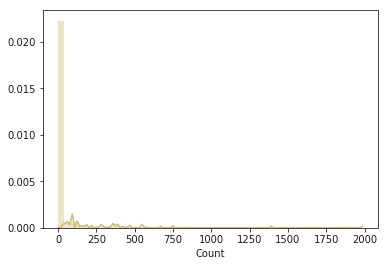

In [27]:
sns.set_color_codes()
ax = sns.distplot(sales_count_df['Count'], color="y")

<bound method Series.unique of 0             21210
1             57533
2             92211
3             08542
4             92646
5             37034
6             98498
7             07043
8             63303
9             11218
10           v0n2w2
11            75009
12       22015-1744
13            91602
14            90405
15            42071
16             4109
17             5066
18             0000
20       84604-6401
22            04627
24            55410
25            43756
26       60202-1213
28            53590
29          2023 EB
30            12060
31            64154
32            23035
34            76016
            ...    
31084    19382-3555
31086         94140
31087         94960
31089         48103
31090         06071
31091         21113
31093         60614
31094       L7M 4B1
31095         02453
31096         53061
31098         17013
31100         60641
31101    14867-9307
31102         92657
31103         97330
31104         78725
31109         10543
31111    

In [58]:
# IRS 2015 Returns
irs = pd.read_csv('/Users/tomasespina/Downloads/15zpallagi.csv', dtype={'zipcode':str})

In [59]:
irs.head()

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,1,AL,00000,1,836320.0,481570.0,109790.0,233260.0,455560.0,1356760.0,...,373410.0,328469.0,0.0,0.0,0.0,0.0,61920.0,48150.0,732670.0,1933120.0
1,1,AL,00000,2,494830.0,206630.0,146250.0,129390.0,275920.0,1010990.0,...,395880.0,965011.0,0.0,0.0,0.0,0.0,73720.0,107304.0,415410.0,1187403.0
2,1,AL,00000,3,261250.0,80720.0,139280.0,36130.0,155100.0,583910.0,...,251490.0,1333418.0,0.0,0.0,0.0,0.0,64200.0,139598.0,193030.0,536699.0
3,1,AL,00000,4,166690.0,28510.0,124650.0,10630.0,99950.0,423990.0,...,165320.0,1414283.0,0.0,0.0,0.0,0.0,45460.0,128823.0,116440.0,377177.0
4,1,AL,00000,5,212660.0,19520.0,184320.0,4830.0,126860.0,589490.0,...,212000.0,3820152.0,420.0,168.0,60.0,31.0,83330.0,421004.0,121570.0,483682.0


In [60]:
irs.zipcode.unique()

array(['00000', '35004', '35005', ..., '83127', '83128', '83414'], dtype=object)

In [62]:
irs[irs['STATE'] == 'NJ'].head()

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
91278,34,NJ,00000,1,1445400.0,1030120.0,149500.0,246000.0,859240.0,1829620.0,...,683420.0,619050.0,0.0,0.0,0.0,0.0,149510.0,126259.0,1182370.0,2224938.0
91279,34,NJ,00000,2,892620.0,485040.0,187200.0,197400.0,548560.0,1604850.0,...,755800.0,2078258.0,20.0,11.0,0.0,0.0,124650.0,216139.0,750810.0,1962401.0
91280,34,NJ,00000,3,580460.0,277210.0,192250.0,93860.0,372460.0,1096580.0,...,560580.0,3318195.0,0.0,0.0,20.0,16.0,119570.0,281651.0,447800.0,1315592.0
91281,34,NJ,00000,4,397280.0,130900.0,210000.0,46180.0,265730.0,868910.0,...,392690.0,3661215.0,20.0,6.0,0.0,0.0,93580.0,280034.0,290880.0,1063502.0
91282,34,NJ,00000,5,695960.0,114910.0,534450.0,40400.0,474640.0,1871240.0,...,693330.0,12675179.0,5470.0,1501.0,760.0,329.0,204810.0,949868.0,462750.0,2206644.0


In [63]:
irs = irs[irs['zipcode'] != '00000']

In [65]:
irs[irs['STATE'] == 'NJ'].head(10)

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
91284,34,NJ,07001,1,2120.0,1500.0,310.0,270.0,1290.0,2700.0,...,1110.0,1043.0,0.0,0.0,0.0,0.0,210.0,180.0,1800.0,3186.0
91285,34,NJ,07001,2,1540.0,780.0,400.0,310.0,1010.0,2940.0,...,1340.0,3611.0,0.0,0.0,0.0,0.0,210.0,328.0,1330.0,3670.0
91286,34,NJ,07001,3,1130.0,470.0,410.0,200.0,760.0,2230.0,...,1090.0,6156.0,0.0,0.0,0.0,0.0,180.0,368.0,930.0,2851.0
91287,34,NJ,07001,4,860.0,190.0,540.0,100.0,590.0,2150.0,...,860.0,7243.0,0.0,0.0,0.0,0.0,160.0,396.0,700.0,2541.0
91288,34,NJ,07001,5,1110.0,150.0,880.0,80.0,820.0,3180.0,...,1110.0,19125.0,0.0,0.0,0.0,0.0,270.0,1060.0,830.0,3582.0
91289,34,NJ,07001,6,110.0,0.0,90.0,0.0,80.0,330.0,...,110.0,7682.0,40.0,35.0,40.0,14.0,50.0,863.0,50.0,287.0
91290,34,NJ,07002,1,11660.0,7600.0,1820.0,2090.0,8090.0,17240.0,...,5800.0,5746.0,0.0,0.0,0.0,0.0,1130.0,931.0,9760.0,21401.0
91291,34,NJ,07002,2,7580.0,3820.0,1640.0,1920.0,5050.0,14320.0,...,6360.0,17490.0,0.0,0.0,0.0,0.0,870.0,1367.0,6640.0,18860.0
91292,34,NJ,07002,3,5030.0,2420.0,1440.0,1030.0,3430.0,9510.0,...,4880.0,29253.0,0.0,0.0,0.0,0.0,780.0,1697.0,4200.0,12927.0
91293,34,NJ,07002,4,3130.0,1090.0,1440.0,500.0,2270.0,6670.0,...,3110.0,30394.0,0.0,0.0,0.0,0.0,620.0,1833.0,2470.0,9461.0


In [72]:
irs.columns.get_loc('A00200')

22

In [81]:
colums_to_drop = irs.iloc[ : , 23 :]

In [83]:
irs.drop(colums_to_drop, axis=1, inplace=True)

In [84]:
irs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166374 entries, 6 to 166679
Data columns (total 23 columns):
STATEFIPS     166374 non-null int64
STATE         166374 non-null object
zipcode       166374 non-null object
agi_stub      166374 non-null int64
N1            166374 non-null float64
mars1         166374 non-null float64
MARS2         166374 non-null float64
MARS4         166374 non-null float64
PREP          166374 non-null float64
N2            166374 non-null float64
NUMDEP        166374 non-null float64
TOTAL_VITA    166374 non-null float64
VITA          166374 non-null float64
TCE           166374 non-null float64
VITA_EIC      166374 non-null float64
RAL           166374 non-null float64
RAC           166374 non-null float64
ELDERLY       166374 non-null float64
A00100        166374 non-null float64
N02650        166374 non-null float64
A02650        166374 non-null float64
N00200        166374 non-null float64
A00200        166374 non-null float64
dtypes: float64(19), 

In [87]:
colunms = ['STATEFIPS', 'PREP', 'N2', 'TOTAL_VITA', 'VITA', 'TCE', 'VITA_EIC', 'RAL']
irs.drop(colunms, axis=1, inplace=True)

In [88]:
irs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166374 entries, 6 to 166679
Data columns (total 15 columns):
STATE       166374 non-null object
zipcode     166374 non-null object
agi_stub    166374 non-null int64
N1          166374 non-null float64
mars1       166374 non-null float64
MARS2       166374 non-null float64
MARS4       166374 non-null float64
NUMDEP      166374 non-null float64
RAC         166374 non-null float64
ELDERLY     166374 non-null float64
A00100      166374 non-null float64
N02650      166374 non-null float64
A02650      166374 non-null float64
N00200      166374 non-null float64
A00200      166374 non-null float64
dtypes: float64(12), int64(1), object(2)
memory usage: 25.3+ MB


In [93]:
# rename columns 

new_name = ['State', 'Zipcode', 'AGI', 'Number of Returns', 'Single Returns', 'Joint Returns', 
            'Head of House Hold', 'Number of Dependents', 'Refund Anticipation Check', 'Elderly Returns', 
            'AGI2', 'N of Returns with Income', 'Total Income', 'N of Returns with Salaries', 'Salaries Amount']

In [94]:
irs.columns = new_name

In [100]:
irs.head(20)

,State,Zipcode,AGI,Number of Returns,Single Returns,Joint Returns,Head of House Hold,Number of Dependents,Refund Anticipation Check,Elderly Returns,AGI2,N of Returns with Income,Total Income,N of Returns with Salaries,Salaries Amount
6,AL,35004,1,1490.0,970.0,230.0,280.0,700.0,360.0,350.0,18971.0,1490.0,19279.0,1140.0,14194.0
7,AL,35004,2,1350.0,630.0,360.0,300.0,830.0,340.0,250.0,50240.0,1350.0,50786.0,1190.0,42043.0
8,AL,35004,3,970.0,310.0,490.0,140.0,700.0,210.0,200.0,59837.0,970.0,60315.0,890.0,51076.0
9,AL,35004,4,620.0,110.0,470.0,30.0,520.0,90.0,130.0,53901.0,620.0,54301.0,580.0,46221.0
10,AL,35004,5,620.0,40.0,560.0,20.0,580.0,70.0,140.0,80056.0,620.0,80468.0,610.0,69610.0
11,AL,35004,6,60.0,0.0,50.0,0.0,40.0,0.0,0.0,17752.0,60.0,18072.0,50.0,8560.0
12,AL,35005,1,1350.0,750.0,190.0,390.0,890.0,470.0,280.0,18370.0,1350.0,18674.0,1050.0,14480.0
13,AL,35005,2,980.0,370.0,230.0,350.0,770.0,340.0,210.0,34878.0,980.0,35087.0,870.0,29925.0
14,AL,35005,3,490.0,150.0,210.0,120.0,370.0,110.0,120.0,29714.0,490.0,29889.0,450.0,24659.0
15,AL,35005,4,250.0,50.0,180.0,40.0,180.0,60.0,60.0,21658.0,250.0,21769.0,240.0,18085.0


In [101]:
irs[irs['Zipcode'] == '35004']['Number of Returns'].median()

795.0

In [128]:
irs[irs['Zipcode'] == '92646']['Salaries Amount'].median()

164034.0

In [113]:
Median_income = irs.groupby('Zipcode')['AGI2'].median()

In [126]:
Median_income.head()

Zipcode
01001    80899.5
01002    70000.0
01005    21820.0
01007    70615.0
01008     5786.0
Name: AGI2, dtype: float64

In [132]:
Sales_with_income = non_dup.join(Median_income, on='postcode')

In [133]:
Sales_with_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16046 entries, 0 to 31132
Data columns (total 12 columns):
email                      16046 non-null object
firstname                  16046 non-null object
lastname                   16046 non-null object
street                     16046 non-null object
city                       16046 non-null object
region                     16046 non-null object
postcode                   16043 non-null object
customer_id                16046 non-null int64
customer_email             16046 non-null object
total_quantaty             16046 non-null float64
total_customer_purchase    16046 non-null float64
AGI2                       13038 non-null float64
dtypes: float64(3), int64(1), object(8)
memory usage: 2.2+ MB
